In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [4]:
df=pd.read_csv(url)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## cabin kısmını düşürelim.

In [9]:
df.drop("Cabin",axis=1,inplace=True)

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

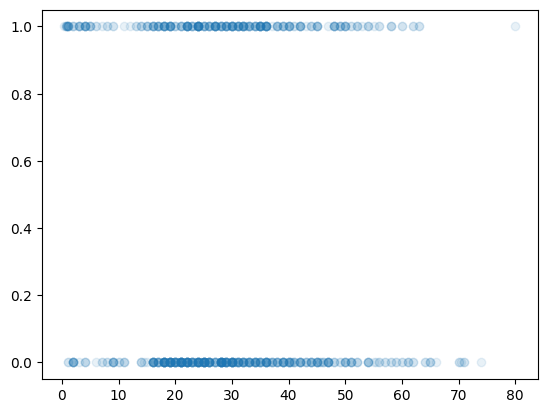

In [12]:
plt.scatter(x="Age",y="Survived",data=df,alpha=0.1) ## yoğunluk haritası çıkarttık.

In [13]:
df[(df["Age"]>70)&(df["Survived"]==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


## Hayatta Kalma Oranları

In [15]:
df[(df["Age"]<20)&(df["Survived"]==1)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 9 to 887
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  79 non-null     int64  
 1   Survived     79 non-null     int64  
 2   Pclass       79 non-null     int64  
 3   Name         79 non-null     object 
 4   Sex          79 non-null     object 
 5   Age          79 non-null     float64
 6   SibSp        79 non-null     int64  
 7   Parch        79 non-null     int64  
 8   Ticket       79 non-null     object 
 9   Fare         79 non-null     float64
 10  Embarked     79 non-null     object 
dtypes: float64(2), int64(5), object(4)
memory usage: 7.4+ KB


In [16]:
df[(df["Age"]<20)&(df["Survived"]==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,C
...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C


In [18]:
len(df[(df["Age"]<20)&(df["Survived"]==1)])

79

In [19]:
len(df[(df["Age"]<20)&(df["Survived"]==0)])

85

In [24]:
mort=((len(df[(df["Age"]<15)&(df["Survived"]==1)])/len(df[df["Age"]<15])))*100
print("15 Yaş altı hayatta kalma oranı: %",mort)

15 Yaş altı hayatta kalma oranı: % 57.692307692307686


In [22]:
len(df[(df["Age"]<15)&(df["Survived"]==0)])/len(df[df["Age"]<15])

0.4230769230769231

In [25]:
len(df[df["Survived"]==1])

342

In [29]:
mort2=round(len(df[df["Survived"]==1])/len(df["Survived"])*100)
print("Titanik Hayatta Kalma Oranı: %",mort2)

Titanik Hayatta Kalma Oranı: % 38


In [30]:
age_na=df[df["Age"].isna()]
age_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
